# Cеминар 3. Методы обработки данных

Подготовка данных

1. Получение данных
2. Обработка данных (Preprocess Data)
	- Преобразование в целевой формат данных (Formatting)
	- Очистка данных: удаление, восстановление, анонимизация. (Cleaning)
	- Выборка части данных из большого набора данных (Sampling)
3. Преобразование данных (Transform Data)
	- Масштабирование данных в определенном промежутке данных (Scaling)
	- Разделение одного признака на несколько (Decomposition)
	- Объединение нескольких признаков в один (Aggregation)



Будем использовать следующий датасет:
- [Pima Indians Diabetes Data Set ](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)

Attribute Information:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

In [3]:
import pandas as pd
import scipy
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)

In [4]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
array = df.values
X = array[:,0:8]
Y = array[:,8]

In [6]:
print(df.head(10))

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


### Feature Scaling

Масштабируем значения признаков от 0 до 1. Для этого будем использовать [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

- X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
- X_scaled = X_std * (max - min) + min

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df[names[:-1]])
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Feature Standardization

[scale(X, axis=0, with_mean=True, with_std=True, copy=True)](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale)

In [33]:
from sklearn.preprocessing import scale
scaler = scale()
df_norm = scaler.fit_transform(df[names[:-1]])
df_norm[:5]

AttributeError: 'function' object has no attribute 'fit_transform'

[StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_norm = scaler.fit_transform(df[names[:-1]])
df_norm[:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

### Data Normalization

In [10]:
from sklearn.preprocessing import Normalizer



In [34]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing.data import QuantileTransformer

from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
X = X_full[:, [0, 5]]

downloading Cal. housing from http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz to C:\Users\akrazer\scikit_learn_data


In [37]:
distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    #('Data after quantile transformation (uniform pdf)',
    #    QuantileTransformer(output_distribution='uniform')
    #    .fit_transform(X)),
    #('Data after quantile transformation (gaussian pdf)',
     #   QuantileTransformer(output_distribution='normal')
     #   .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X))
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

In [38]:
%matplotlib inline

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cm.plasma_r(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

In [39]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cm.plasma_r,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')

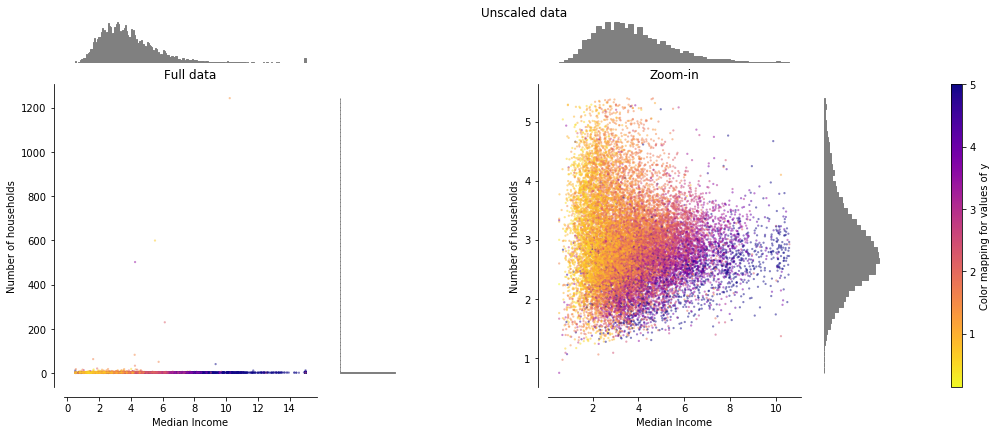

In [40]:
make_plot(0)

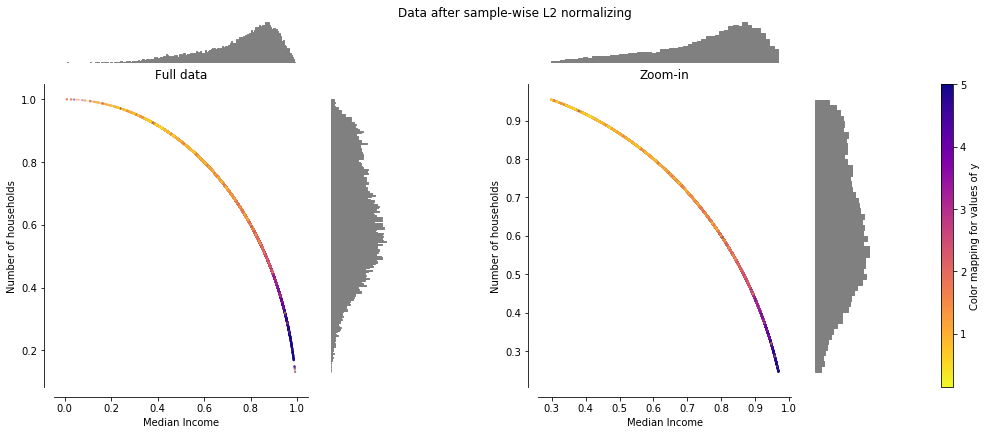

In [45]:
make_plot(5)

### Encoding categorical features

- [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)
- [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

### OneHotEncoder
Многие методы не могут работать с категориальными признаками. Класс OneHotEncoder преобразует значения одного признака в N бинарных признаков с значениями 0 или 1

In [1]:
from sklearn.preprocessing import OneHotEncoder

X_t = [[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]]
ohe = OneHotEncoder()
result = ohe.fit_transform(X_t)
ohe.n_values_

array([2, 3, 4])

In [2]:
ohe.feature_indices_

array([0, 2, 5, 9], dtype=int32)

In [ ]:
# test on [[0, 1, 1]]

### Label Encoder

Многие методы не могут работать с категориальными признаками. Для Преобразования их в целочисленные значения можно использовать класс LabelEncoder.

In [57]:
from sklearn.preprocessing import LabelEncoder
y_t = ["paris", "paris", "tokyo", "amsterdam"]
le = LabelEncoder()
result = le.fit_transform(y_t)

In [ ]:
# test on ["tokyo", "tokyo", "paris"]

In [ ]:
# test on [2, 2, 1]

### Binarize Data

In [ ]:
from sklearn.preprocessing import Binarizer
#преобразует по порогу

# Transforming

### Replacing

In [ ]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

In [ ]:
# replace -999 to NaN

In [ ]:
# replace -999 and -1000 to NaN

In [ ]:
# replace -999 and -1000 to  NaN and 0 

In [ ]:
# use map for previous step

### Merging data

In [59]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                  'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [60]:
right1

,group_val
a,3.5
b,7.0


In [61]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [ ]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

In [ ]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2000, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])
lefth

In [ ]:
righth

In [ ]:
# merge by key1 and key2

### Removing duplicates

In [ ]:
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

In [ ]:
data.duplicated()

In [ ]:
# remove

### Transforming data using a function or mapping

In [ ]:
import pandas as pd
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

Добавим колонку,показывающую из какого животного получено мясо. Для этого добавим словарь.

In [ ]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [ ]:
data['food'] = data['food'].map(str.lower)
data['animal'] = data['food'].map(meat_to_animal)
data

In [ ]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

### Binning

In [62]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)

In [63]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [64]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [65]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [66]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, object): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [67]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [ ]:
# если передать в функцию pd.cut не множество, а целое число, то данные будут помещены в bins на основе расстояния между ними

data = np.random.rand(20)
pd.cut(data, 4, precision=2)

# Task

Используя данные о диабете
1. Загрузите данные
2. Добавьте в датасет поле "Sex".
3. Заполните каждую запись одним из значений - "Male","Female",Nan
4. Постройте график зависимости наличия диабета от возраста
5. Обучите линейный классификатор
6. Обучите метод опорных векторов с различными значениями параметра штрафа $C$.
7. Для каждого значения С выведите accuracy на обучащюей и контрольной выборке.
8. Разбейте на 4 бина значения признака Age и повторите пункты 6,7

In [68]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)

In [69]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


C:\Users\akrazer\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\akrazer\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\akrazer\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(array([ 16.,  15.,  14.,  16.,  23.,   6.,  22.,  14.,   5.,  16.,  10.,
          9.,  20.,  11.,  13.,  11.,   1.,   8.,  12.,   4.,   5.,   2.,
          4.,   4.,   1.,   2.,   0.,   2.,   1.,   1.]),
 array([ 21.        ,  22.63333333,  24.26666667,  25.9       ,
         27.53333333,  29.16666667,  30.8       ,  32.43333333,
         34.06666667,  35.7       ,  37.33333333,  38.96666667,
         40.6       ,  42.23333333,  43.86666667,  45.5       ,
         47.13333333,  48.76666667,  50.4       ,  52.03333333,
         53.66666667,  55.3       ,  56.93333333,  58.56666667,
         60.2       ,  61.83333333,  63.46666667,  65.1       ,
         66.73333333,  68.36666667,  70.        ]),
 <a list of 30 Patch objects>)

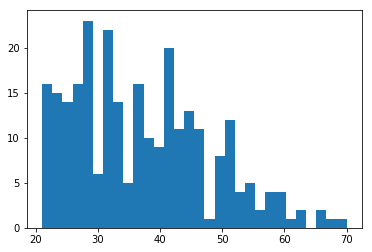

In [94]:
df['Sex'] = np.zeros(len(df))
from sklearn.preprocessing import Imputer
df['Sex'][df['preg']>0] = 1
df['Sex'][df['preg']<=0] = 0
df['Sex'][df['Sex']==1] = 'Female'
df['Sex'][df['Sex']==0] = 'Male'
plt.hist(df['age'][df['class']==1], bins = 30)

In [100]:
from sklearn.svm import SVC
linclass = SVC()
linclass = linclass.fit(df.drop('class',axis = 1),df['class'])

ValueError: could not convert string to float: 'Female'